# CS6650 : Smart Sensing for Internet of Things
#### Homework 3 (Holi 2023 Semester)
Submission Deadline : April 23rd, 2023

---
Name: `Your Name`

Roll No: `CSXXM5XX`

Email: `CSXXM5XX@smail.iitm.ac.in`

---

### Android-based GNSS Measurements

<div style="display:flex; overflow: hidden;">
  <img src="./images/image6.png" width="400" height="250" style="margin:20px; object-fit: cover; object-position: top;">
  <div style="margin:20px;"> 
    <p>GNSS (Global Navigation Satellite System) today includes a variety of satellite constellations, including the GPS (American, global), GLONASS (Russian, global), BeiDou (Chinese, global), Galileo (European, global), NavIC (Indian, regional) and QZSS (Japanese, regional). Depending on your smartphone’s hardware capabilities, you can tap into signals from such constellations and update your location. Google provides an array of open-source <a href="https://github.com/google/gps-measurement-tools">tools</a> for performing GNSS-related measurements on commodity Android smartphones and analyzing such datasets.</p>
    <p>
    Download and install this app ( <a href="https://play.google.com/store/apps/details?id=com.google.android.apps.location.gps.gnsslogger&hl=en_IN&gl=US">GnssLogger App – Apps on Google Play</a>) to get started. Ensure the location permissions are provided to this app, and you have turned on your phone's location service (e.g., GPS). Turn on the "location" switch in the GNSSLogger app, as shown in the figure. Go to the next tab, "Log", and check whether you receive the GNSS specific diagnostic messages that include your location coordinates (latitude and longitude fix). <b>Make sure "Fused location" and "Network location" in the GNSS logger app are turned off before you start logging</b>. You can save the log data to a file and export this to the SD card or share it to your drive/email for offline use. Try playing with this app and make sure you are receiving the logs correctly. Cross-check the location coordinates reported by the app in Google maps.
    </p>
  </div>
</div>

---
Concentrate on the lines starting with keywords with “Fix” and `Status” (see GNSS Status [API](https://developer.android.com/reference/android/location/GnssStatus)). “Fix” related lines will provide you with the location coordinates of your phone. Only consider lines with “Fix, GPS” (raw GPS) and not “Fix, FLP” (fused location, uses IMU for correction).  <a id='measurements'></a>

- **Sample fix line (we are interested only in the red highlighted part)**: Fix, Provider, <span style="color:red">LatitudeDegrees, LongitudeDegrees</span>, AltitudeMeters, SpeedMps, AccuracyMeters, BearingDegrees, UnixTimeMillis, SpeedAccuracyMps, BearingAccuracyDegrees, elapsedRealtimeNanos. 

    Example: Fix, GPS, <span style="color:red">12.997769, 80.240794</span>, -100.513824, 0.000000, 5.360000, 0.000000, 1616658843000, 0.49396357, 0.0, 1742433115036168

- **Sample status line (we are interested only in the red highlighted part)**: Status, UnixTimeMillis, SignalCount, SignalIndex, <span style="color:red">ConstellationType, Svid</span>, CarrierFrequencyHz, <span style="color:red">Cn0DbHz, AzimuthDegrees, ElevationDegrees, UsedInFix</span>, HasAlmanacData, HasEphemerisData, BasebandCn0DbHz 
Example: Status, 1616658843000, 40, 38, <span style="color:red">6, 1</span>, 1575420032, <span style="color:red">15.00, 355.00, 37.00, 1</span>, 1, 0,

- **ConstellationType**: Only use GPS (for now, please ignore data from GLONASS, BeiDou etc., even if your phone supports it). Flag for GPS = 1, (see [this](https://developer.android.com/reference/android/location/GnssStatus#CONSTELLATION_GPS))
- **Svid**: Satellite ID
- **Cn0DbHz**: Signal Strength or SNR of the signal received from the particular satellite.
- **AzimuthDegrees (0 - 360) & Elevation Degrees (0 - 90)**: of the satellite ([Wiki](https://en.wikipedia.org/wiki/Azimuth))
- **UsedInFix**: Indicates whether this particular satellite was used for the latest fix for multilateration (remember, you need at least 4 of them?).

<div style="display:flex; flex-direction: column; align-items: center;">
        <figure style="margin: 20px; text-align: center; float: left;">
          <img src="./images/image3.png" width="600" height="400" >
          <figcaption>Fig. 1: Azimuth and Elevation</figcaption>
        </figure>
    </div>


### Tasks

First, create a directory following the `<Your_Roll>_CS6650H23` structure. Next, download this notebook and save it in the directory you created.


<div style="display:flex;">
  <img src="./images/image2.jpg" width="400" height="200" style="margin:20px;">
  <div style="margin:20px;"> 
    <p>Collect the <a href="#measurements">above</a> measurement logs at three distinct locations as indicated in the picture left.</p>
    <ol>
    <li>The smartphone is under the open sky a few meters from the entrance/door of your building.</li>
    <li> The smartphone is at the entrance (or some window) of your building, the sky is partially visible, and </li>
    <li> The smartphone is completely inside the building, very limited portion of the sky is visible maybe through the door/window.</li>
    </ol>
    <p>At each of these locations, collect GNSSLogger data for about 5 - 10 minutes (Perform the experiments on a sunny day with a clear sky). Now perform the following tasks.</p>
  </div>
</div>


1. [ ] [Attach sky photos of data collection locations (10 points)](#task1)
2. [ ] [Compute and plot location errors using haversine distance (15 points)](#task2)
3. [ ] [Analyze status entries before fix and their relation to error (45 points)](#task3)
4. [ ] [Show satellite statistics and SNR plots by azimuth and elevation (20 points)](#task4)
5. [ ] [Plot SNR by azimuth in angular space with satellite image (10 points)](#task5)

---

#### Guidelines for the Assignment
Before you start working on the assignment, please read the following instructions carefully:


- Clean and well-documented code is expected. Your code should be organized in a clear and readable manner, with each task separated into its own section of the notebook.

- There will be no separate PDF report required. Instead, provide a detailed but to-the-point discussion in the observation section for each task. The observation section (in Markdown, Refer to [Markdown-Cheatsheet](https://github.com/lifeparticle/Markdown-Cheatsheet)) includes a clear and concise description of the task, the approach used to solve it, assumptions, and inferences.

- Any extraneous information that does not address the question should be removed before submission. This will help to ensure that the answer is clear and easy to follow.

Failure to follow these practices will result in a penalty.

**Deadline: $23^{nd}$, April, 2023**

#### Submission Instructions
- Compress the top-level directory (ZIP format) containing this notebook with your code and the data used for the assignment. (do not remove the outputs from the notebook cells)

- **You MUST refrain from consulting your homework code with others**. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.

- Submissions after the deadline will not be entertained.


<div class="alert alert-block alert-success">
    <b>Tip</b>: Our recommendation to the students is to begin the assignment as soon as possible. If you have any doubts, please fill out the <a href="https://forms.gle/oMSkBsijAdWFS8rm7">Google Form</a> with the necessary information and the instructor will address all concerns in the next class.
</div>


### Task 1: Attach sky photos of data collection locations [10 points] <a id='task1'></a>
Attach photos of the three locations with the phone, where data is collected, particularly the exposure to the sky.


Please find the images mentioned by the names given below in the respective directory

IMG_20230416_142343__01_inside.jpg   ===>  for the data collected inside
IMG_20230416_144443_outside.jpg      ===>  for the data collected outside
IMG_20230416_145347__01_entrance.jpg ===>  for the data collected at the Entrance

##### Observations Task 1

Edit this section to put your observations.

### Task 2: Compute and plot location errors using haversine distance [15 points] <a id='task2'></a>
Calculate the mean location coordinates for all three locations. Assume those three locations as the `groundtruth`. Compute the error for each location fix sample, which is the distance between the location sample and the groundtruth location. You must use haversine distance ([Wiki](https://en.wikipedia.org/wiki/Haversine_formula)). Plot the CDF (cumulative distribution function) of these errors for the three locations. Comment on the variance of the three distributions.


Mean latitude: [17.445578106439413, 17.4457674216738, 17.445750464313267]
Mean longitude: [78.38268433931822, 78.38281047755362, 78.3826875793253]


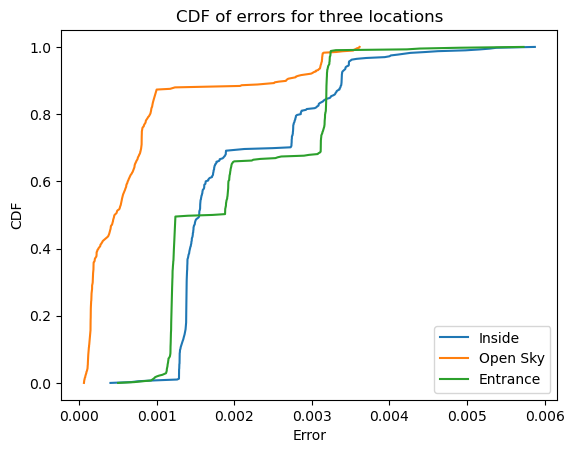

In [5]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

ground_truth_latitudes = []
ground_truth_longitudes = []

file_paths = ["gnss_log_2023_04_16_14_16_25_inside.txt", "gnss_log_2023_04_16_14_35_48_outside.txt", "gnss_log_2023_04_16_14_46_14_entrance.txt"]
lbl = [ "Inside", "Open Sky", "Entrance"]
# Initialize a list to store the errors
errors_list = []


def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in kilometers
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in km
    return d


# Loop through each file
for i, file_name in enumerate(file_paths):
    # Open the file and read each row
    mean_latitude = 0
    mean_longitude = 0

    # Initialize lists to store latitude and longitude values
    latitudes = []
    longitudes = []
    with open(file_name, newline='') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            if len(row) > 1 and row[1] == 'GPS':  # Ensure that the row corresponds to GPS data
                latitudes.append(float(row[2]))
                longitudes.append(float(row[3]))

                #print("latitudes: ", float(row[2]))
                #print("longitudes", float(row[3]))

    # Calculate the mean latitude and longitude
    mean_latitude = sum(latitudes) / len(latitudes)
    mean_longitude = sum(longitudes) / len(longitudes)

    ground_truth_latitudes.append(mean_latitude)
    ground_truth_longitudes.append(mean_longitude)


    length = len(latitudes)

    errors = []
    for j in range(length):
        error = haversine(latitudes[j], longitudes[j], ground_truth_latitudes[i], ground_truth_longitudes[i])
        errors.append(error)
    errors_list.append(errors)

    # Plot the CDF for the three locations
    errors = np.array(errors_list[i])
    sorted_errors = np.sort(errors)
    cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors) - 1)
    plt.plot(sorted_errors, cdf, label=lbl[i])


print('Mean latitude:', ground_truth_latitudes)
print('Mean longitude:', ground_truth_longitudes)
#print('errors: ', errors)

# Add labels and legend
plt.xlabel('Error')
plt.ylabel('CDF')
plt.title('CDF of errors for three locations')
plt.legend()
plt.show()


##### Observations Task 2

    Error |  Inside  | Entrance |  Open Sky
    ________________________________________
    0.002 |  0.885   |  0.692   |  0.626
    0.003 |  0.820   |  0.680   |  0.918


Here CDF values are actually higher for the outside/Open-Sky location compared to the other two locations for both errors.
means that a larger proportion of the data falls within a smaller error range for the outside location compared to the inside and entrance locations.
Implies the variance is smaller for the outside location compared to the inside and entrance locations.

 A smaller variance indicates that the data points are more tightly clustered around the mean, which means that they are more predictable and less variable. This can be seen in the CDF plots, where a smaller variance results in a steeper increase in the CDF and a higher percentage of the data points falling within a smaller range of values.

### Task 3: Analyze status entries before fix and their relation to error [45 points] <a id='task3'></a>
Check the `status` entries prior to receiving a `fix`.
1. How many satellites were used for the fix (check the UsedInFix entry for the satellites) for the three locations? (state the median # of satellites)
2. How does the distance error for a fix correlate to the number of satellites used for that fix? Show scatter plots for the three locations. Summarize your observations.
3. How does the distance error for a fix correlate to the average SNR (Cn0DbHz entry) of the satellites that were used in the fix? Show scatter plots for the three locations. Summarize your observations.


Median number of satellites used for the fix : Inside: 5.0
Median number of satellites used for the fix : Open Sky: 9.0
Median number of satellites used for the fix : Entrance: 7.0


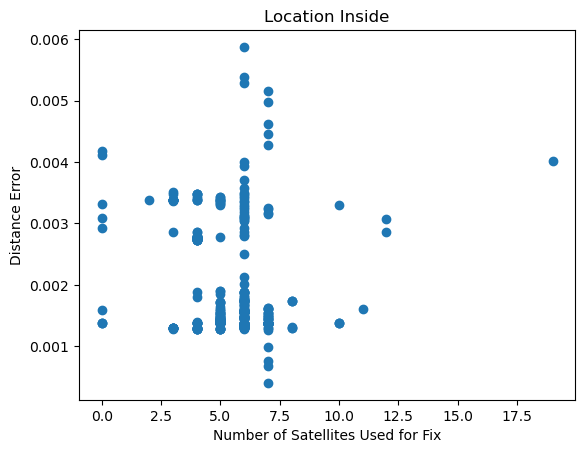

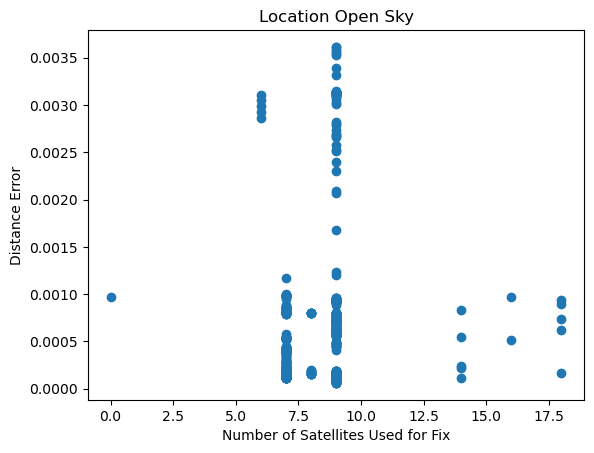

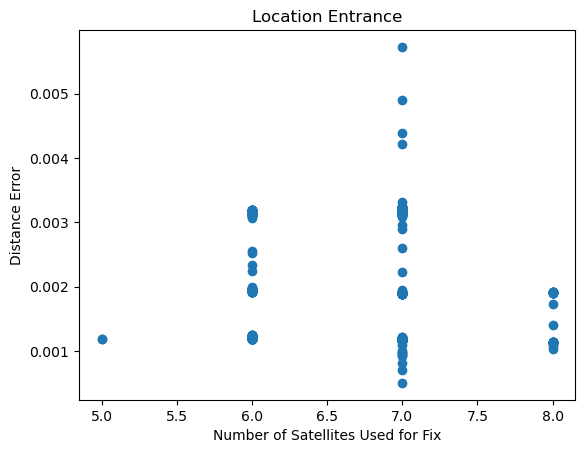

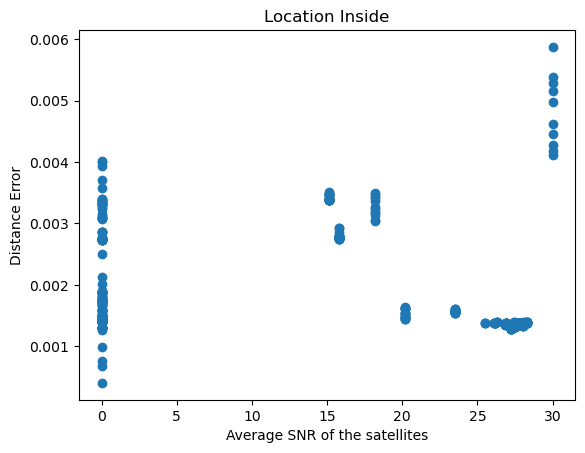

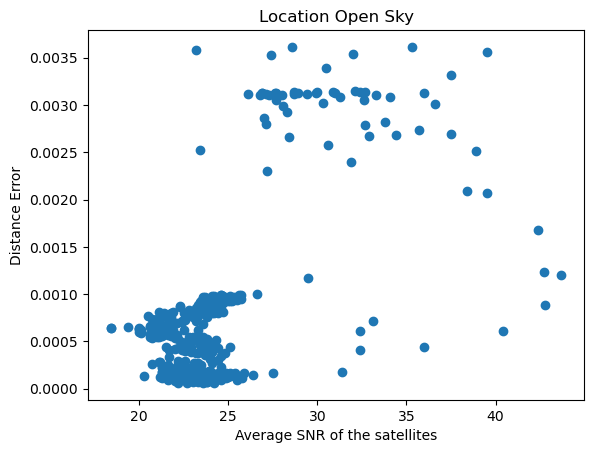

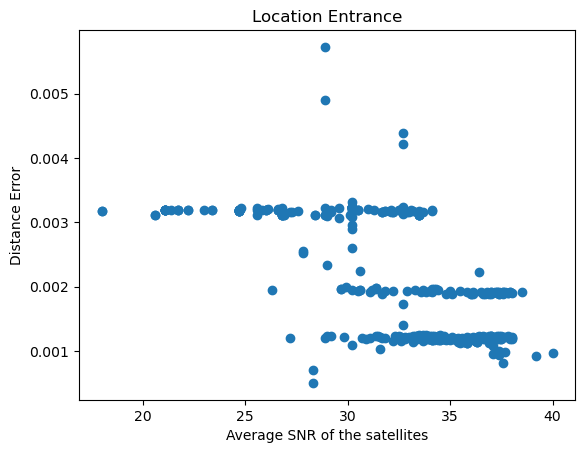

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


file_paths = ["gnss_log_2023_04_16_14_16_25_inside.txt", "gnss_log_2023_04_16_14_35_48_outside.txt", "gnss_log_2023_04_16_14_46_14_entrance.txt"]
lbl = [ "Inside", "Open Sky", "Entrance"]
errors_list = []
g_sat_list = []
g_average_SNR = []

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in kilometers
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in km
    return d


def distanceError(lat, long):
    ground_truth_latitudes = 0
    ground_truth_longitudes = 0

    # Calculate the mean latitude and longitude
    mean_latitude = sum(latitudes) / len(latitudes)
    mean_longitude = sum(longitudes) / len(longitudes)

    ground_truth_latitudes = mean_latitude
    ground_truth_longitudes = mean_longitude


    length = len(latitudes)

    errors = []
    for j in range(length):
        error = haversine(latitudes[j], longitudes[j], ground_truth_latitudes, ground_truth_longitudes)
        errors.append(error)
    errors_list.append(errors)

def plot_location(x_val, y_val, xlbl):
    # create scatter plot
    for idx, name in enumerate(file_paths):
        plt.scatter(x_val[idx], y_val[idx])
        plt.title(f"Location {lbl[idx]}")
        plt.xlabel(xlbl)
        plt.ylabel("Distance Error")
        plt.show()

# Loop through each file
for i, file_name in enumerate(file_paths):

    # Initialize lists to store latitude and longitude values
    latitudes = []
    longitudes = []

    with open(file_name, 'r') as f:
        reader = f.readlines()

        # extract relevant data from the log file
        sats_used = []
        average_SNR = []
        sats_used_per_fix = 0

        Cn0DbHz = 0
        # loop through each row
        for row in reader:
            entries = row.split(',')
            if 'Status,' in row:
                if entries[0] == 'Status':
                    constellation_type = int(entries[4])
                    used_in_fix = int(entries[10])
                    if constellation_type == 1:
                        sats_used_per_fix += used_in_fix                       
                        Cn0DbHz = float(entries[7])
                        
            if 'GPS,' in row:
                sats_used.append(sats_used_per_fix)
                sats_used_per_fix = 0

                latitudes.append(float(entries[2]))
                longitudes.append(float(entries[3]))

                average_SNR.append(Cn0DbHz)

        
        #print(f"Number of satellites per fix count : {len(sats_used)}: {lbl[i]}: {sats_used}" )
        #print(f"Average SNR : {len(average_SNR)}: {lbl[i]}: {average_SNR}" )

    distanceError(latitudes, longitudes)

    g_sat_list.append(sats_used)
    g_average_SNR.append(average_SNR)

    # compute median of number of satellites used for the fix
    median_sats_used = np.median(sats_used)
    print(f"Median number of satellites used for the fix : {lbl[i]}: {median_sats_used}")


plot_location(g_sat_list, errors_list, xlbl="Number of Satellites Used for Fix")
plot_location(g_average_SNR, errors_list, xlbl="Average SNR of the satellites")
 

##### Observations Task 3

    Part2: 
    
      Location "Inside": shows the weakest correlation between number of satellites used and distance error. 
      The scatter plot is more scattered compared to the other two locations. 
      Because of more signal interferences and obstacles that affect the GNSS signal quality.
  
    Part3:
          Location "Open Sky": there is a lot of scatter in the data. 
          there is a positive correlation between the average SNR and the distance error, 
          which means that as the SNR increases, the distance error tends to decrease.

### Task 4: Show satellite statistics and SNR plots by azimuth and elevation [20 points] <a id='task4'></a>
Only consider the `status` instances where a particular satellite was used for a location fix.
1. Show a table for the `Svid`, `Average Azimuth`, `Average Elevation`, `Average SNR` (each row for a specific satellite). 
1. Plot `Average Azimuth` (0 - 360 degrees) with `Average SNR` (see Note)
1. Plot `Average Elevation` (0, 90 degrees) with `Average SNR`



<div class="alert alert-block alert-info">
    <div style="display:flex; margin:20px;">
        <img src="./images/image1.jpg" width="300" height="200" >
        <div style="margin:20px;"> 
            <h2> How to calculate the azimuth corresponding to the direction of the window or door?</h2>
            <p>Take the two points (Lat1, Lon1) and (Lat2, Lon2) and use <a href="https://www.fcc.gov/media/radio/distance-and-azimuths">this website</a>, or any other online azimuth calculator. Basically, the azimuth gives you the angle the black line makes with 0 degrees north.
            </p>
        </div>
    </div>
</div>

Inside
Svid	Avg Azimuth	Avg Elevation	Avg SNR
5	184.00		30.43		30.85
6	23.00		33.84		25.05
11	325.72		67.17		20.15
12	328.77		34.23		19.80
17	70.87		12.25		20.23
19	50.03		26.59		20.02
20	161.51		57.14		34.17
24	252.56		30.64		29.11
25	322.00		5.00		16.30


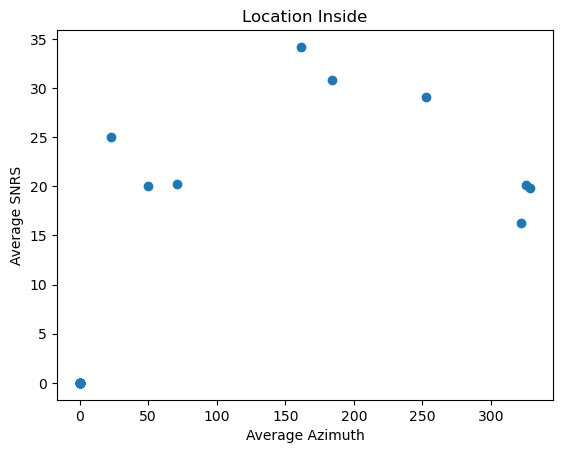

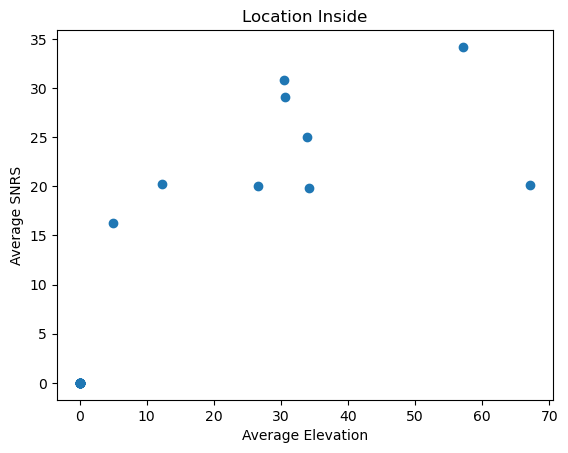

Open Sky
Svid	Avg Azimuth	Avg Elevation	Avg SNR
5	182.75		35.62		33.80
6	25.72		29.59		30.68
11	340.94		61.51		35.59
12	328.06		39.95		23.68
17	77.11		9.91		29.16
19	57.51		24.49		33.29
20	155.55		62.35		33.68
24	246.82		29.03		32.81
25	322.00		11.72		25.51


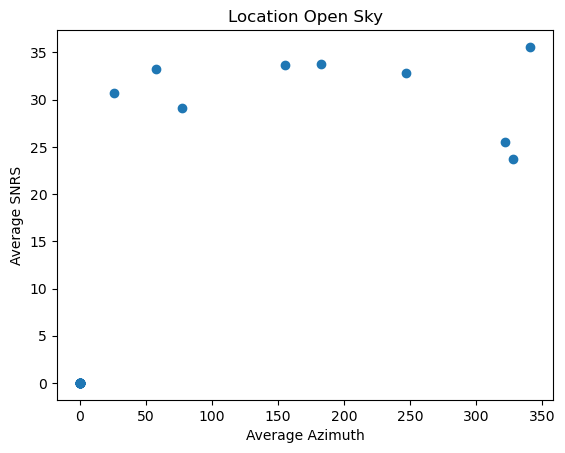

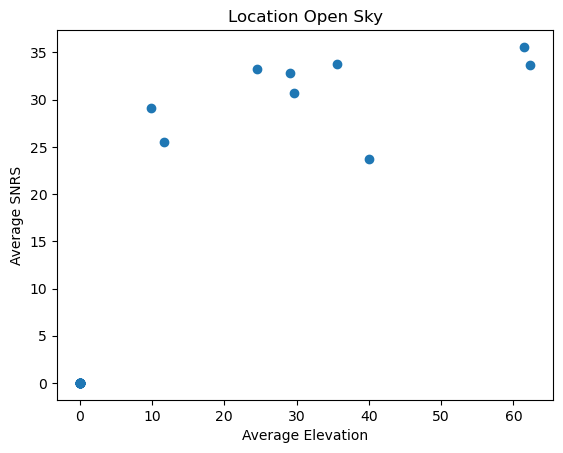

Entrance
Svid	Avg Azimuth	Avg Elevation	Avg SNR
5	182.43		37.32		32.05
6	27.08		27.31		31.50
11	345.08		59.45		34.86
12	327.52		44.00		33.28
17	79.65		9.20		29.32
19	60.45		23.90		34.19
20	155.55		62.35		33.68
24	246.39		28.87		31.92
25	322.00		14.16		31.22


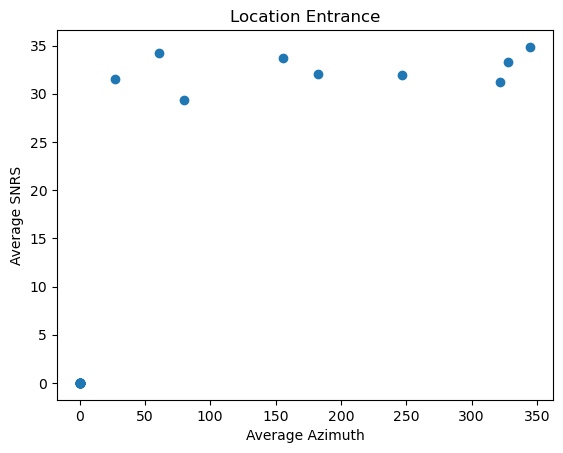

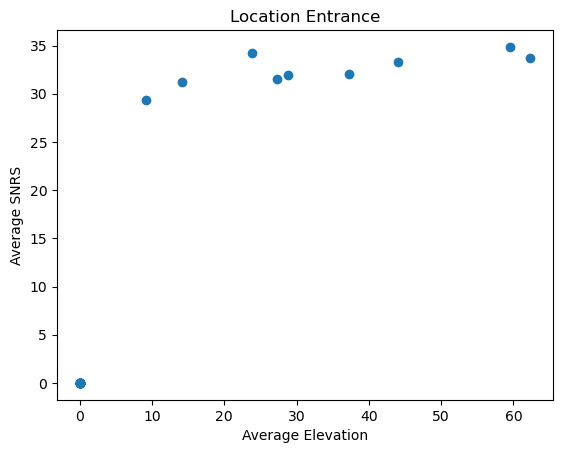

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math


file_paths = ["gnss_log_2023_04_16_14_16_25_inside.txt", "gnss_log_2023_04_16_14_35_48_outside.txt", "gnss_log_2023_04_16_14_46_14_entrance.txt"]
lbl = [ "Inside", "Open Sky", "Entrance"]

# Initialize lists to store azimuth, elevation, and SNR values for each satellite
max_sat_id = 0
azimuths = [[] for _ in range(100)]
elevations = [[] for _ in range(100)]
snrs = [[] for _ in range(100)]

def computeAverage(azimuths, elevations, snrs, max_sat_id):
    avg_azimuths = []
    avg_elevations = []
    avg_snrs = []

    for i in range(max_sat_id):
        if len(azimuths[i]) > 0:
            avg_azimuths.append(np.mean(azimuths[i]))
        else:
            avg_azimuths.append(0)
            
        if len(elevations[i]) > 0:
            avg_elevations.append(np.mean(elevations[i]))
        else:
            avg_elevations.append(0)
            
        if len(snrs[i]) > 0:
            avg_snrs.append(np.mean(snrs[i]))
        else:
            avg_snrs.append(0)   

    return avg_azimuths,avg_elevations,avg_snrs

def plot_location(x_val, y_val, lbl, xlbl, ylbl):
    plt.scatter(x_val, y_val)
    plt.title(f"Location {lbl}")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

# Loop through each file
for i, file_name in enumerate(file_paths):
    with open(file_name, 'r') as f:
        reader = f.readlines()

        # extract relevant data from the log file
        sats_used = []
        sats_used_per_fix = 0

        Cn0DbHz = 0
        # loop through each row
        for row in reader:
            entries = row.split(',')
            if 'Status,' in row:
                if entries[0] == 'Status':
                    constellation_type = int(entries[4])
                    used_in_fix = int(entries[10])
                    if constellation_type == 1:
                        sats_used_per_fix += used_in_fix                       
                        Cn0DbHz = float(entries[7])
                        # Get the azimuth, elevation, and SNR for this satellite
                        svid = int(entries[5])
                        if svid > max_sat_id:
                            max_sat_id = svid
                        azimuth = float(entries[8])
                        elevation = float(entries[9])
                        if used_in_fix > 0:
                            azimuths[svid-1].append(azimuth)
                            elevations[svid-1].append(elevation)
                            snrs[svid-1].append(Cn0DbHz)

            if 'GPS,' in row:
                sats_used.append(sats_used_per_fix)
                sats_used_per_fix = 0

    avg_azimuths,avg_elevations,avg_snrs = computeAverage(azimuths, elevations, snrs, max_sat_id)
    # Print out the results for each satellite
    print(f"{lbl[i]}\nSvid\tAvg Azimuth\tAvg Elevation\tAvg SNR")
    for idx in range(max_sat_id):
        if len(azimuths[idx]) > 0:
            print(f"{idx+1}\t{avg_azimuths[idx]:.2f}\t\t{avg_elevations[idx]:.2f}\t\t{avg_snrs[idx]:.2f}")

    #print(f"Max Sat ID: {max_sat_id}")

    plot_location(avg_azimuths, avg_snrs, lbl[i], xlbl="Average Azimuth", ylbl="Average SNRS")
    plot_location(avg_elevations, avg_snrs,   lbl[i], xlbl="Average Elevation", ylbl="Average SNRS")

##### Observations Task 4

Edit this section to put your observations.

### Task 5: Plot SNR by azimuth in angular space with satellite image [10 points] <a id='task5'></a>

<!-- <div style="display: flex; justify-content: center;">
        <img src="./images/image4.jpg" width="300" height="300">
        <img src="./images/image5.png" width="400" height="300">
    <p style="float: right; margin-left: 10px;">
        See the figures to the left. Two example plots are also shown on the right for your reference. Either you can plot in the cartesian space or in the angular (R, theta) space. Magnitude of R can signify your SNR. To make it more interesting, you can superimpose the angular plot on a satellite image, say from Google maps (of course, you need to rotate the image to align the azimuths). This should show the effect of buildings, trees, obstacles on the SNR. Does your plot (particularly, for location 2, where the phone is kept on the window sill or door) peak for a certain azimuth? This azimuth should roughly match with the direction of the clear sky from that location.
    </p>
</div> -->

<div style="display: block; justify-content: center; align-items: center; margin: 20px">
  <div style="display: flex; justify-content: center; align-items: center;">
    <img src="./images/image4.jpg" width="300" height="300">
    <img src="./images/image5.png" width="400" height="300">
  </div>
  <p style="margin-left: 10px;">See the figures above. Two example plots are also shown on the right for your reference. Either you can plot in the cartesian space or in the angular (R, theta) space. Magnitude of R can signify your SNR. To make it more interesting, you can superimpose the angular plot on a satellite image, say from Google maps (of course, you need to rotate the image to align the azimuths). This should show the effect of buildings, trees, obstacles on the SNR. Does your plot (particularly, for location 2, where the phone is kept on the window sill or door) peak for a certain azimuth? This azimuth should roughly match with the direction of the clear sky from that location.</p>
</div>

Inside
Svid	Avg Azimuth	Avg Elevation	Avg SNR
5	184.00		30.43		30.85
6	23.00		33.84		25.05
11	325.72		67.17		20.15
12	328.77		34.23		19.80
17	70.87		12.25		20.23
19	50.03		26.59		20.02
20	161.51		57.14		34.17
24	252.56		30.64		29.11
25	322.00		5.00		16.30


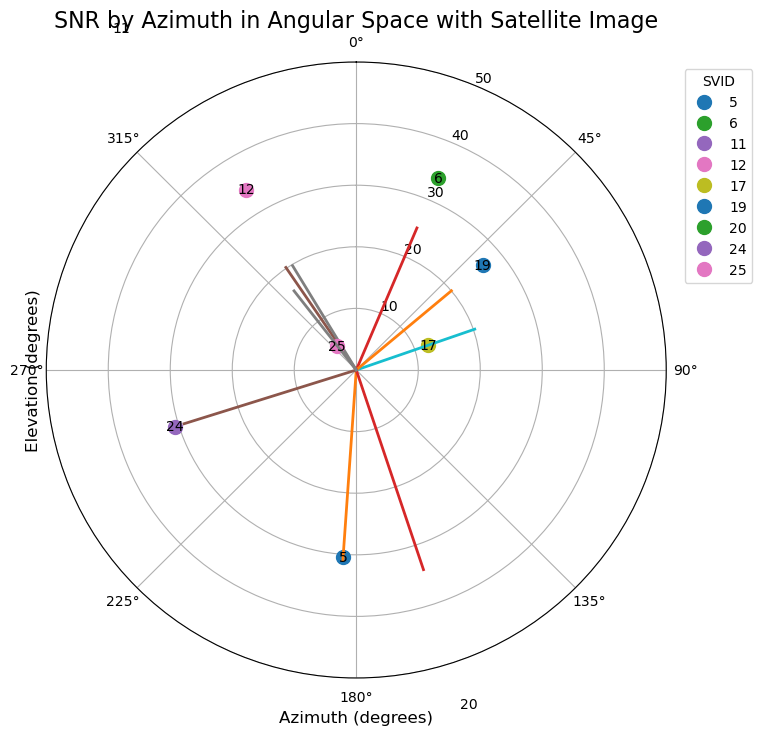

Open Sky
Svid	Avg Azimuth	Avg Elevation	Avg SNR
5	182.75		35.62		33.80
6	25.72		29.59		30.68
11	340.94		61.51		35.59
12	328.06		39.95		23.68
17	77.11		9.91		29.16
19	57.51		24.49		33.29
20	155.55		62.35		33.68
24	246.82		29.03		32.81
25	322.00		11.72		25.51


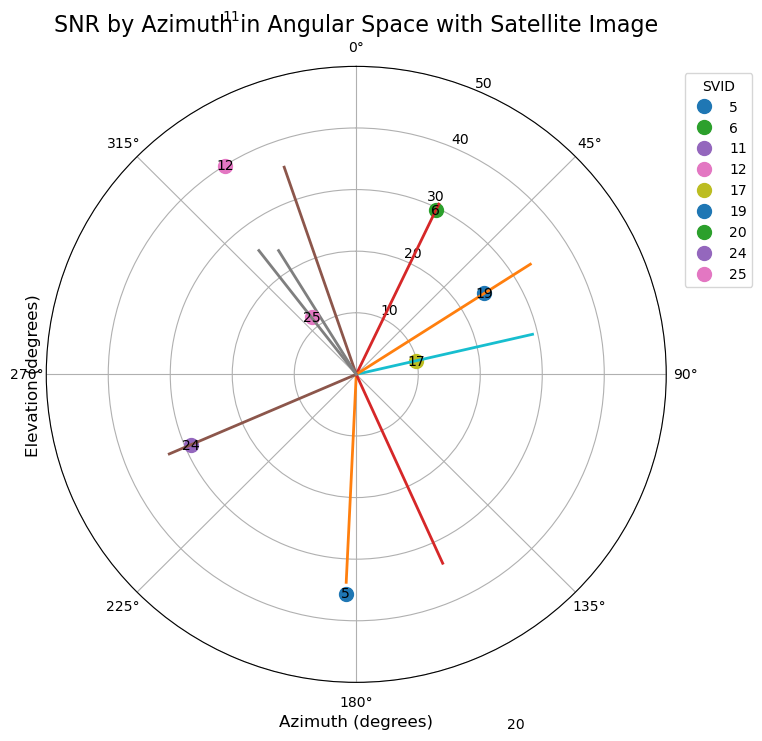

Entrance
Svid	Avg Azimuth	Avg Elevation	Avg SNR
5	182.43		37.32		32.05
6	27.08		27.31		31.50
11	345.08		59.45		34.86
12	327.52		44.00		33.28
17	79.65		9.20		29.32
19	60.45		23.90		34.19
20	155.55		62.35		33.68
24	246.39		28.87		31.92
25	322.00		14.16		31.22


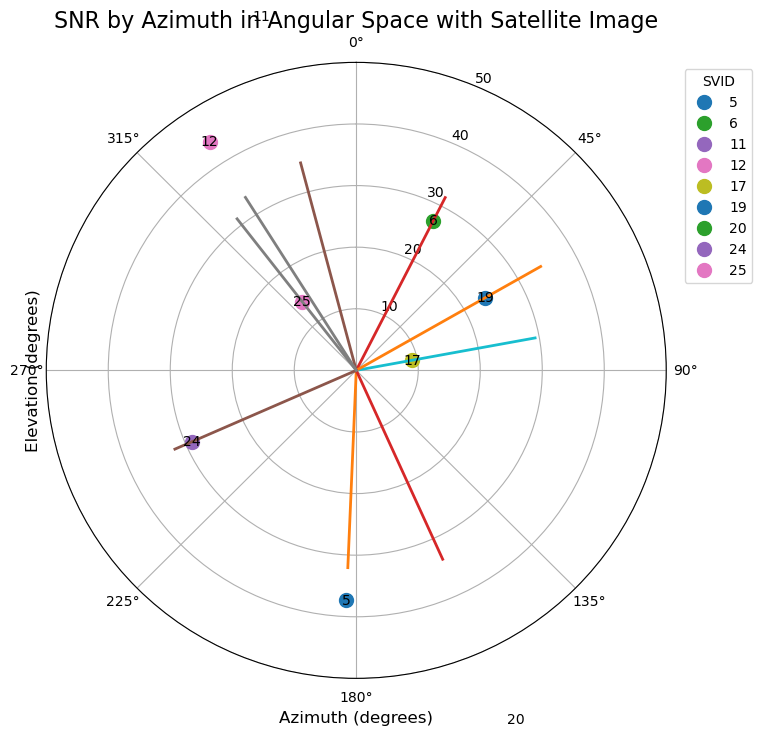

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math


file_paths = ["gnss_log_2023_04_16_14_16_25_inside.txt", "gnss_log_2023_04_16_14_35_48_outside.txt", "gnss_log_2023_04_16_14_46_14_entrance.txt"]
lbl = [ "Inside", "Open Sky", "Entrance"]

# Initialize lists to store azimuth, elevation, and SNR values for each satellite
max_sat_id = 0
azimuths = [[] for _ in range(100)]
elevations = [[] for _ in range(100)]
snrs = [[] for _ in range(100)]

def computeAverage(azimuths, elevations, snrs, max_sat_id):
    avg_azimuths = []
    avg_elevations = []
    avg_snrs = []

    for i in range(max_sat_id):
        if len(azimuths[i]) > 0:
            avg_azimuths.append(np.mean(azimuths[i]))
        else:
            avg_azimuths.append(0)
            
        if len(elevations[i]) > 0:
            avg_elevations.append(np.mean(elevations[i]))
        else:
            avg_elevations.append(0)
            
        if len(snrs[i]) > 0:
            avg_snrs.append(np.mean(snrs[i]))
        else:
            avg_snrs.append(0)   

    return avg_azimuths,avg_elevations,avg_snrs

def plot_location(avg_azimuths, avg_elevations, avg_snrs, max_sat_id):
    # Set up the polar plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='polar')
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_rlim(0, 50)
    ax.set_rticks([10, 20, 30, 40, 50])
    ax.set_rlabel_position(22.5)
    ax.grid(True)

    sat_img = plt.imread('satellite_image.png')
    ax.imshow(sat_img, extent=[0, 2*np.pi, 0, 50], aspect='auto', alpha=0)

    for idx in range(max_sat_id):
        if len(azimuths[idx]) > 0:
            print(f"{idx+1}\t{avg_azimuths[idx]:.2f}\t\t{avg_elevations[idx]:.2f}\t\t{avg_snrs[idx]:.2f}")

            # Plot SNR by azimuth in angular space
            theta = np.radians(avg_azimuths[idx])
            r = avg_elevations[idx]
            ax.plot(theta, r, 'o', markersize=10, label=idx+1)
            ax.text(theta, r, idx+1, ha='center', va='center', fontsize=10)
            ax.plot([theta, theta], [0, avg_snrs[idx]], '-', linewidth=2)

        # Add legend
    ax.legend(title='SVID', bbox_to_anchor=(1.15, 1))

    # Add title and axis labels
    plt.title('SNR by Azimuth in Angular Space with Satellite Image', fontsize=16)
    plt.xlabel('Azimuth (degrees)', fontsize=12)
    plt.ylabel('Elevation (degrees)', fontsize=12)

    plt.show()


# Loop through each file
for i, file_name in enumerate(file_paths):
    with open(file_name, 'r') as f:
        reader = f.readlines()

        # extract relevant data from the log file
        sats_used = []
        sats_used_per_fix = 0

        Cn0DbHz = 0
        # loop through each row
        for row in reader:
            entries = row.split(',')
            if 'Status,' in row:
                if entries[0] == 'Status':
                    constellation_type = int(entries[4])
                    used_in_fix = int(entries[10])
                    if constellation_type == 1:
                        sats_used_per_fix += used_in_fix                       
                        Cn0DbHz = float(entries[7])
                        # Get the azimuth, elevation, and SNR for this satellite
                        svid = int(entries[5])
                        if svid > max_sat_id:
                            max_sat_id = svid
                        azimuth = float(entries[8])
                        elevation = float(entries[9])
                        if used_in_fix > 0:
                            azimuths[svid-1].append(azimuth)
                            elevations[svid-1].append(elevation)
                            snrs[svid-1].append(Cn0DbHz)

            if 'GPS,' in row:
                sats_used.append(sats_used_per_fix)
                sats_used_per_fix = 0

    avg_azimuths,avg_elevations,avg_snrs = computeAverage(azimuths, elevations, snrs, max_sat_id)
    # Print out the results for each satellite
    print(f"{lbl[i]}\nSvid\tAvg Azimuth\tAvg Elevation\tAvg SNR")
    plot_location(avg_azimuths, avg_elevations, avg_snrs, max_sat_id)



##### Observations Task 5

Edit this section to put your observations.